In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('BXP.L.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-28,97.5,99.940002,95.300003,96.0,92.247681,49785
1,2021-09-29,96.0,96.250000,94.000000,95.5,91.767220,34717
2,2021-09-30,95.5,94.059998,94.000000,95.5,91.767220,4000
3,2021-10-01,95.5,94.888000,94.000000,95.5,91.767220,28244
4,2021-10-04,95.5,94.888000,94.500000,95.5,91.767220,7753


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-09-22,72.5,70.0,70.0,71.5,71.5,8000
248,2022-09-23,71.5,73.0,68.0,71.5,71.5,9585
249,2022-09-26,71.5,71.5,71.5,71.5,71.5,0
250,2022-09-27,71.5,71.5,71.5,71.5,71.5,0
251,2022-09-28,71.5,72.0,72.0,71.5,71.5,119


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,91.321032,92.539182,89.739421,91.177778,90.617613,23505.630952
std,13.068139,13.721867,12.849147,13.008176,12.793172,40361.597841
min,67.500000,68.260002,65.000000,67.500000,67.500000,0.000000
25%,80.000000,79.886751,78.314999,80.000000,80.000000,1334.500000
50%,95.500000,96.458000,94.000000,95.500000,93.689049,10208.000000
75%,100.000000,102.762497,99.000000,100.000000,100.000000,28103.000000
max,123.500000,131.000000,120.000000,123.500000,123.500000,294116.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.979907,0.979477,0.989603,0.984399,0.164019
High,0.979907,1.000000,0.976530,0.985391,0.981596,0.217254
Low,0.979477,0.976530,1.000000,0.984953,0.978818,0.115877
Close,0.989603,0.985391,0.984953,1.000000,0.994630,0.184257
Adj Close,0.984399,0.981596,0.978818,0.994630,1.000000,0.176167
Volume,0.164019,0.217254,0.115877,0.184257,0.176167,1.000000


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.shape

(252, 7)

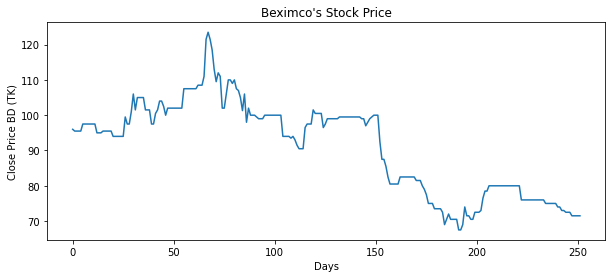

In [9]:
plt.figure(figsize=(10,4))
plt.title("Beximco's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price BD (TK)")
plt.plot(df.Close)

In [10]:
df.Volume.value_counts()

0        33
5000      6
1000      2
4000      2
500       2
         ..
18307     1
8944      1
10456     1
31900     1
119       1
Name: Volume, Length: 211, dtype: int64

In [11]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.score(X_train, y_train)

0.988759576145528

In [15]:
lr.score(X_test, y_test)

0.9862511115779574

In [16]:
print(lr.coef_)

[4.90833872e-01 2.10822569e-01 2.85381067e-01 1.02791182e-05]


In [17]:
lr.intercept_

1.0439081606487122

In [18]:
predict = lr.predict(X_test)

In [19]:
predict

array([ 81.73441941, 105.68035035,  81.40748608,  99.50693001,
        98.13443251,  71.88091476,  97.28006519,  74.45991209,
       108.13747778,  98.82749037, 101.98548874,  76.05875877,
        92.72645024,  70.50415596,  90.75384373, 110.35560856,
        80.28176298,  80.77861229,  82.24118287,  97.7828887 ,
        70.63005248, 103.75296288,  74.81471781,  99.25414021,
        93.02102491,  71.86641502,  97.28006519, 106.09404694,
        70.80012921, 101.11938735,  72.60412749,  97.54440611,
        91.53594496,  73.69989708,  81.72807015,  97.43085893,
        71.71684572,  95.45814097,  93.82543392,  69.58866091,
        96.67135586,  98.04763279,  78.17836387,  77.42191818,
       100.70309325,  98.98406941,  74.76132807, 105.3950576 ,
       109.81435403,  73.591165  , 112.16241053,  82.93473943,
        81.03035157, 103.18012555, 107.44993768,  76.98762592,
        76.05875877,  95.70645735,  80.0069088 ,  95.41574235,
        97.35023094, 107.0335224 ,  96.05298063])

In [20]:
df2 = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predict})

In [21]:
df2

,Actual Price,Predicted Price
158,80.5,81.734419
83,105.0,105.680350
170,81.5,81.407486
101,100.0,99.506930
150,100.0,98.134433
...,...,...
221,80.0,80.006909
15,95.5,95.415742
152,92.5,97.350231
74,102.0,107.033522


In [22]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predict))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error: 1.0052262956411744
Mean Squared Error: 2.230262650678405
Root Mean Squared Error: 1.493406391669195


In [23]:
graph = df2.head()

<AxesSubplot:>

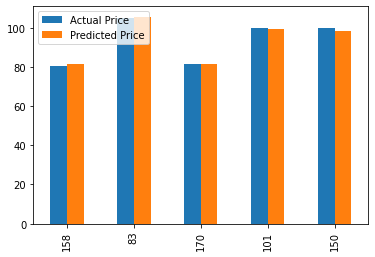

In [24]:
graph.plot(kind='bar')

Text(0, 0.5, 'Days')

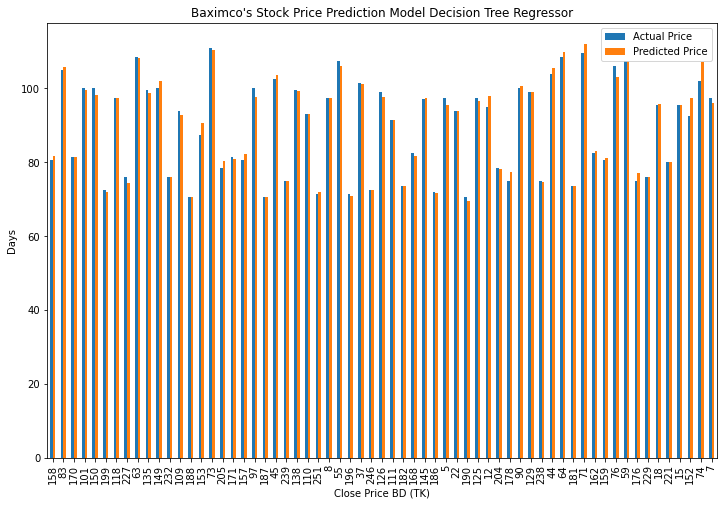

In [25]:
df2.plot(kind='bar', figsize= (12,8))
plt.title("Baximco's Stock Price Prediction Model Decision Tree Regressor")
plt.xlabel("Close Price BD (TK)")
plt.ylabel("Days")